In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow as tf
import cv2
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


# part A)

In [28]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


  

## resizing

In [29]:
X_test_24 = []
X_test_16 = []
X_test_8 = []

for i in range(len(X_test)):
  X_test_24.append(cv2.resize(X_test[i] , (24,24) , interpolation=cv2.INTER_CUBIC  ))
  X_test_16.append(cv2.resize(X_test[i] , (16,16) , interpolation=cv2.INTER_CUBIC  ))
  X_test_8.append(cv2.resize(X_test[i] , (8,8) , interpolation=cv2.INTER_CUBIC  ))

X_test_24 = np.array(X_test_24)
X_test_16 = np.array(X_test_16)
X_test_8 = np.array(X_test_8)


## showing the images in different sizes

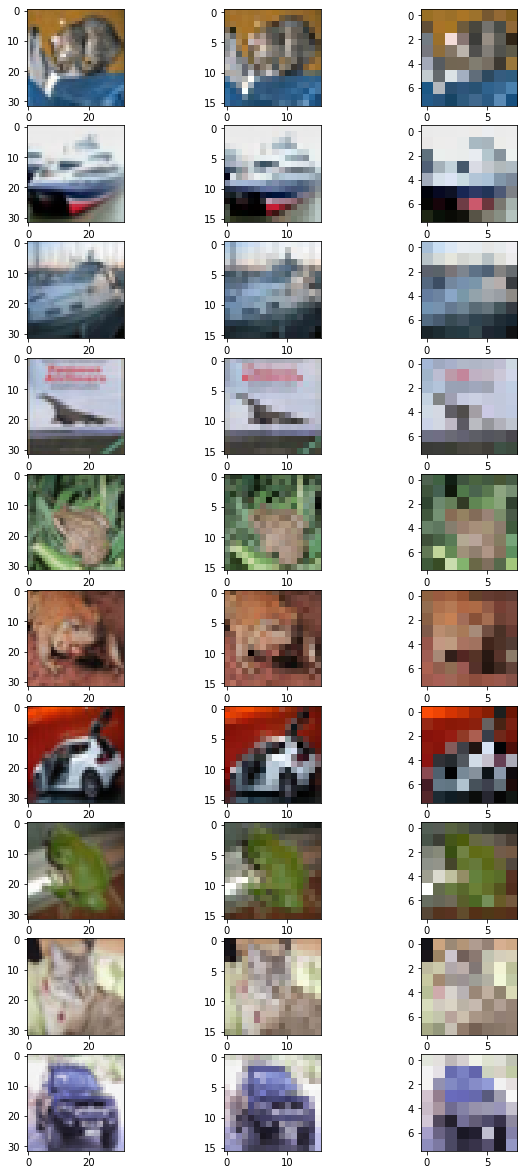

In [30]:
fig = plt.figure(figsize=(10,21))
for i in range(10):
  ax = fig.add_subplot(10, 3, i*3+1)
  plt.imshow(X_test[i])

  ax = fig.add_subplot(10, 3, 3*i+2)
  plt.imshow(X_test_16[i])

  ax = fig.add_subplot(10, 3, 3*i+3)
  plt.imshow(X_test_8[i])

plt.show()

# Part B) answered in the report

# Part C) TOTV

In [31]:
X_test_16to32 = []
X_test_24to32 = []
X_test_8to32 = []

for i in range(len(X_test)):
  X_test_16to32.append(cv2.resize(X_test_16[i] , (32,32) , interpolation=cv2.INTER_CUBIC ))
  X_test_24to32.append(cv2.resize(X_test_24[i] , (32,32) , interpolation=cv2.INTER_CUBIC ))
  X_test_8to32.append(cv2.resize(X_test_8[i] , (32,32) , interpolation=cv2.INTER_CUBIC ))

X_test_24to32 = np.array(X_test_24to32)
X_test_16to32 = np.array(X_test_16to32)
X_test_8to32 = np.array(X_test_8to32)


Normalizing

In [32]:
X_train = X_train/255
X_test = X_test/255
X_test_24 = X_test_24/255
X_test_16 = X_test_16/255
X_test_8 = X_test_8/255
X_test_16to32 = X_test_16to32/255
X_test_24to32 = X_test_24to32/255
X_test_8to32 = X_test_8to32/255

# to free up RAM
del X_test_24
del X_test_16
del X_test_8

## Creating the TOTV CNN 

In [33]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10 , activation = 'softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

## Training the Model with 32*32 resolution images

In [34]:
model.summary()
history = model.fit(X_train, Y_train, epochs = 100, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                      

## Testing the Model with 32*32 images

In [35]:
y_pred=model.predict(X_test)
y_label=np.argmax(y_pred , axis=1)
len(y_label)

313/313 [==============================] - 1s 2ms/step


10000

## Testing with 32*32 images model summery

In [36]:
print('accuracy: ',metrics.accuracy_score(Y_test, y_label))
print('CL Report: \n',metrics.classification_report(Y_test, y_label, zero_division=1))

accuracy:  0.7922
CL Report: 
               precision    recall  f1-score   support

           0       0.72      0.87      0.79      1000
           1       0.92      0.86      0.89      1000
           2       0.72      0.68      0.69      1000
           3       0.69      0.61      0.65      1000
           4       0.78      0.77      0.77      1000
           5       0.75      0.70      0.72      1000
           6       0.83      0.86      0.85      1000
           7       0.80      0.85      0.82      1000
           8       0.84      0.89      0.86      1000
           9       0.87      0.84      0.85      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



## Testing the Model with 24*24 images

In [37]:
y_pred=model.predict(X_test_24to32)
y_label=np.argmax(y_pred , axis=1)
len(y_label)

313/313 [==============================] - 1s 2ms/step


10000

## Testing with 24*24 images Model summary

In [38]:
print('accuracy: ',metrics.accuracy_score(Y_test, y_label))
print('CL Report: \n',metrics.classification_report(Y_test, y_label, zero_division=1))


accuracy:  0.7632
CL Report: 
               precision    recall  f1-score   support

           0       0.72      0.86      0.78      1000
           1       0.89      0.85      0.87      1000
           2       0.68      0.67      0.67      1000
           3       0.60      0.60      0.60      1000
           4       0.78      0.70      0.74      1000
           5       0.62      0.77      0.69      1000
           6       0.88      0.77      0.82      1000
           7       0.81      0.80      0.80      1000
           8       0.83      0.88      0.85      1000
           9       0.92      0.74      0.82      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



## Testing the Model with 16*16 images

In [39]:
y_pred=model.predict(X_test_16to32)
y_label=np.argmax(y_pred , axis=1)
len(y_label)

313/313 [==============================] - 1s 2ms/step


10000

## Testing with 16*16 images Model summary

In [40]:
print('accuracy: ',metrics.accuracy_score(Y_test, y_label))
print('CL Report: \n',metrics.classification_report(Y_test, y_label, zero_division=1))


accuracy:  0.6061
CL Report: 
               precision    recall  f1-score   support

           0       0.65      0.75      0.70      1000
           1       0.88      0.64      0.74      1000
           2       0.59      0.61      0.60      1000
           3       0.36      0.60      0.45      1000
           4       0.71      0.51      0.59      1000
           5       0.40      0.76      0.52      1000
           6       0.89      0.39      0.54      1000
           7       0.74      0.57      0.64      1000
           8       0.73      0.81      0.77      1000
           9       0.92      0.42      0.58      1000

    accuracy                           0.61     10000
   macro avg       0.69      0.61      0.61     10000
weighted avg       0.69      0.61      0.61     10000



## Testing the Model with 8*8 images

In [41]:
y_pred=model.predict(X_test_8to32)
y_label=np.argmax(y_pred , axis=1)
len(y_label)

313/313 [==============================] - 1s 2ms/step


10000

## Testing with 8*8 images Model summary

In [42]:
print('accuracy: ',metrics.accuracy_score(Y_test, y_label))
print('CL Report: \n',metrics.classification_report(Y_test, y_label, zero_division=1))


accuracy:  0.3051
CL Report: 
               precision    recall  f1-score   support

           0       0.43      0.52      0.47      1000
           1       0.88      0.06      0.11      1000
           2       0.34      0.43      0.38      1000
           3       0.18      0.72      0.29      1000
           4       0.49      0.20      0.28      1000
           5       0.26      0.37      0.31      1000
           6       0.64      0.07      0.13      1000
           7       0.58      0.14      0.23      1000
           8       0.43      0.54      0.48      1000
           9       0.69      0.01      0.02      1000

    accuracy                           0.31     10000
   macro avg       0.49      0.31      0.27     10000
weighted avg       0.49      0.31      0.27     10000



# Part D) is done in a separate notebook